## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [59]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 之前做過的處理

In [60]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [61]:
app_train['DAYS_EMPLOYED'].head()

0    -637.0
1   -1188.0
2    -225.0
3   -3039.0
4   -3038.0
Name: DAYS_EMPLOYED, dtype: float64

In [62]:
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
app_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [63]:
print(app_train['TARGET'].corr(app_train['DAYS_EMPLOYED']))
(app_train['DAYS_EMPLOYED']/365).describe()

-0.07495845742543962


count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [64]:
#app_train[app_train['DAYS_EMPLOYED'] == 365243]
days_employed = app_train[app_train['DAYS_EMPLOYED'] == 0]
days_employed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
23691,127568,0,0,0,0,2,189000.0,983299.5,36571.5,904500.0,...,1,0,0,0,0,0,0,1,0,False
121625,241013,1,0,0,1,1,112500.0,134775.0,7438.5,112500.0,...,0,0,0,0,0,0,0,0,0,False


In [65]:
#app_train['YEAR_EMPLOYED'] = app_train['DAYS_EMPLOYED'] / 365
#employed_data = app_train[['TARGET','DAYS_EMPLOYED']]
employed_data = app_train.loc[app_train['DAYS_EMPLOYED'] > 0,['TARGET','DAYS_EMPLOYED']]
employed_data['YEAR_EMPLOYED'] = employed_data['DAYS_EMPLOYED'] / 365

# Equal Width Group
employed_data['YEAR_BINNED'] = pd.cut(employed_data['YEAR_EMPLOYED'], bins = np.linspace(0, 50, num = 11))
print(employed_data['YEAR_BINNED'].value_counts())

employed_data.head(10)

(0.0, 5.0]      136309
(5.0, 10.0]      64872
(10.0, 15.0]     27549
(15.0, 20.0]     10849
(20.0, 25.0]      6243
(25.0, 30.0]      3308
(30.0, 35.0]      1939
(35.0, 40.0]       832
(40.0, 45.0]       210
(45.0, 50.0]        24
Name: YEAR_BINNED, dtype: int64


,TARGET,DAYS_EMPLOYED,YEAR_EMPLOYED,YEAR_BINNED
0,1,637.0,1.745205,"(0.0, 5.0]"
1,0,1188.0,3.254795,"(0.0, 5.0]"
2,0,225.0,0.616438,"(0.0, 5.0]"
3,0,3039.0,8.326027,"(5.0, 10.0]"
4,0,3038.0,8.323288,"(5.0, 10.0]"
5,0,1588.0,4.350685,"(0.0, 5.0]"
6,0,3130.0,8.575342,"(5.0, 10.0]"
7,0,449.0,1.230137,"(0.0, 5.0]"
9,0,2019.0,5.531507,"(5.0, 10.0]"
10,0,679.0,1.860274,"(0.0, 5.0]"


In [66]:
employed_group = employed_data.groupby('YEAR_BINNED').mean()
employed_group

,TARGET,DAYS_EMPLOYED,YEAR_EMPLOYED
YEAR_BINNED,,,
"(0.0, 5.0]",0.105708,864.340763,2.368057
"(5.0, 10.0]",0.073714,2630.224689,7.206095
"(10.0, 15.0]",0.057752,4466.899670,12.238081
"(15.0, 20.0]",0.048484,6306.860448,17.279070
"(20.0, 25.0]",0.047573,8092.875701,22.172262
"(25.0, 30.0]",0.039903,9961.437122,27.291609
"(30.0, 35.0]",0.041258,11791.751418,32.306168
"(35.0, 40.0]",0.019231,13517.634615,37.034615
"(40.0, 45.0]",0.004762,15325.461905,41.987567


Text(0.5,1,'Failure to Repay by Employed Group')

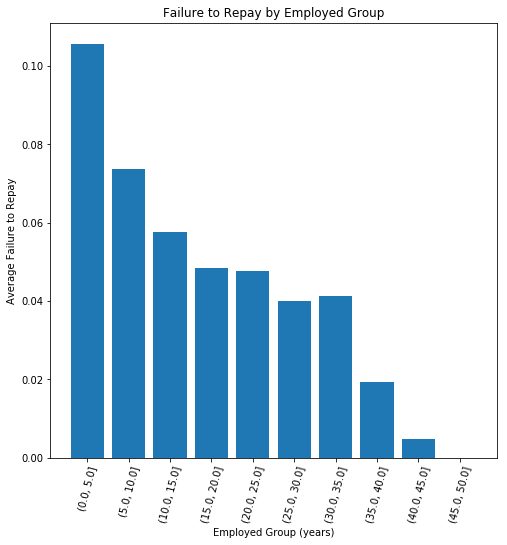

In [67]:
plt.figure(figsize = (8, 8))
plt.bar(range(len(employed_group.index)), employed_group['TARGET'])
plt.xticks(range(len(employed_group.index)), employed_group.index, rotation = 75)
plt.xlabel('Employed Group (years)')
plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Employed Group')